In [1]:
#RUN THIS BEFORE USING
%reset
%matplotlib inline
import network_modules as nm
import graph_measures as gm
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import networkx as nx
import collections
import scipy.signal as sig

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
slider1 = widgets.IntSlider(min=50, max=5000, step=50, value= 50, description = 'n')
slider2 = widgets.IntSlider(min=1, max=10, value=1, description = 'm')
slider3 = widgets.FloatSlider(min=0, max=10, value=1, description = 'a')
slider4 = widgets.FloatSlider(min=0, max=2*np.pi, value=0, description = 'b')
slider5 = widgets.FloatSlider(min=0, max=1, value=0, description = 'c')
slider6 = widgets.FloatSlider(min=0, max=10, value=1, description = 'K')
display(slider1, slider2, slider3, slider4, slider5,slider6)

In [ ]:
n = slider1.value
m = slider2.value
print('n = ',n)
print('m = ',m)
G = nx.barabasi_albert_graph(n, m)

In [ ]:
gm.degree_distribution(G)

In [ ]:
#Parameter Initialization

distributions = [(n,0,2*np.pi,'uniform'),(n,10,2,'normal')]
states = nm.create_vec_states(distributions)
z = np.cos(states[:,0]) + 1j * np.sin(states[:,0])
w = 1j * states[:,1]
x = [[a,b] for a,b in zip(z,w)]

def currynode(w):
    def node(x):   #node function
        return np.array([1j * x[0] * w + x[0]*(1-abs(x[0])),0*1j]) # apply limit cycle term to keep in a circle
    return node

h = [currynode(w) for w in states[:,1]]

def f(x,y): #coupling function
    a = slider3.value
    b = slider4.value
    c = slider5.value
    K = slider6.value
    phi = np.angle(y[0])-np.angle(x[0])
    return np.array([1j * x[0] * complex(K*(np.sin(a*phi+b)+c),0),0*1j])

M = np.identity(n) #Measurement Matrix
N = 0 #Noise Variance

oscillator = nm.nmodel(G,x,h,f,M,N,dt=.01)
oscillator.run(10)
nm.state_course(np.real(nm.reduce_state(0,oscillator.x)))

In [ ]:
nm.plt_graph(oscillator.G)
plt.figure()
x = gm.cross_func(nm.reduce_state(0,oscillator.x),gm.phase_synchrony)
plt.imshow(x, interpolation= "nearest")


In [ ]:
def frange(start, stop, step):  
    i = start
    while i < stop:
        yield i
        i += step
        
@interact(off = (0.0,2*np.pi))
def f(off):
    x = np.array([np.cos(x) + 1j*np.sin(x) for x in frange(0,4*np.pi,.1)])
    y = np.array([np.cos(x + off) + 1j*np.sin(x + off) for x in frange(0,4*np.pi,.1)])
    plt.figure()
    plt.plot(np.array(x)[0])
    plt.plot(np.array(y)[0])
    plt.show()
    print(gm.correlation(x,y))
    

In [ ]:
#f, t, s = sig.spectrogram(signal, fs = 1000, window, nperseg, noverlap, nfft)
#f, Pxx = sig.welch(signal, fs = 1000, window, nperseg, noverlap, nfft)
#import pywt
#cA, cD = pywt.dwt([1, 2, 3, 4], 'db1') - Direct Wavelet Transform

In [ ]:
def create_random_matrix(n,p):
    A = np.zeros((n,n))
    for i in range(n):
        A[i,i] = 0
        for j in range(i+1,n):
            if random() < p:
                A[i,j] = 1
                A[j,i] = 1
    return A
n = 5
N = 10000
d = []
for m in range(N):
    A = create_random_matrix(n,.5)
    B = create_random_matrix(n,.5)
    d.append(sum(sum(A))/n**2)
plt.figure()
plt.hist(d,100)
plt.xlim(0,1)
plt.show()

In [ ]:
def offset_sinusoid(off,compare):
    x = np.array([np.cos(x) + 1j*np.sin(x) for x in frange(0,4*np.pi,.1)])
    y = np.array([np.cos(x + off) + 1j*np.sin(x + off) for x in frange(0,4*np.pi,.1)])
    return compare(x,y)
diff = []
for off in frange(0,2*np.pi,.1):
    diff.append(offset_sinusoid(off,gm.phase_synchrony))
plt.figure()
phase = [x for x in frange(0,2*np.pi,.1)] 
plt.plot(phase,np.real(diff))
plt.plot(phase,np.imag(diff))
plt.show()

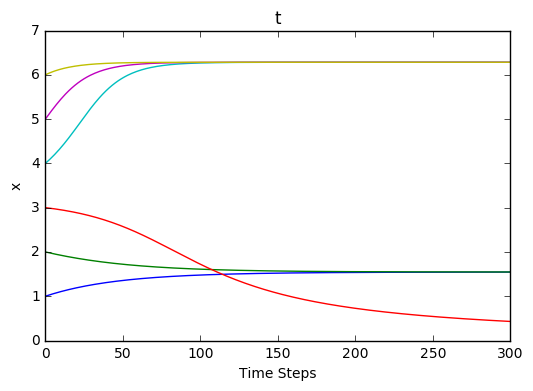

[[ 0.          0.14170525  0.16207965  0.21039604  0.15830482  0.15562533]
 [ 0.11861322  0.          0.13031913  0.1727411   0.12917386  0.12762697]
 [ 0.72275856  0.73288877  0.          0.78439071  0.54377742  0.59067019]
 [ 0.58751609  0.58350346  0.79031533  0.          0.72748712  0.69969909]
 [ 0.32427383  0.32120076  0.47762021  0.54595211  0.          0.40494389]
 [ 0.07083184  0.07010031  0.10724037  0.12077916  0.09468924  0.        ]]


In [84]:
coherence = lambda X,Y: max(sig.coherence(X,Y)[1])
nodes = [0,1,2,3,4,5]
Graphh = nx.Graph()
Graphh.add_nodes_from(nodes)
Graphh.add_edges_from([(0,1)])
def h(x):
    return -x*np.sin(x)
def f(x,y):
    return y
Matrix = np.identity(6)
Noise = 0
state = [[1],[2],[3],[4],[5],[6]]
tester = nm.nmodel(Graphh,state,h,f,Matrix,Noise,dt=.01)
tester.run(3)
nm.state_course(tester.x[:,0,:])
#print(gm.cross_func(tester.x[:,0,:], gm.correlation))
print(PDC_func(tester.x[:,0,:]))
#print(gm.partial_method(tester.x[:,0,:],gm.r2))